## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import regex as re
import emoji
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import seaborn as sns
import csv
from chardet import detect
from spellchecker import SpellChecker
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\casti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\casti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Reading Dataset

In [2]:
dataset = pd.read_csv('Datasets/DuringElection.csv')

## Understanding the Data

In [3]:
dataset.head()

,Tweet,Username,Date
0,Comelec says there are onsite technicians in p...,cnnphilippines,5/9/2022
1,"The campaign period already ended on May 7, bu...",cnnphilippines,5/9/2022
2,Comelec advises the public that all complaints...,cnnphilippines,5/9/2022
3,The 2022 national elections is proceeding with...,cnnphilippines,5/9/2022
4,WATCH: Bongbong Marcos casting his ballot in B...,cnnphilippines,5/9/2022


In [4]:
dataset.shape

(5000, 3)

In [5]:
dataset.dtypes

Tweet       object
Username    object
Date        object
dtype: object

In [6]:
dataset.describe()

,Tweet,Username,Date
count,5000,5000,5000
unique,3728,2055,1
top,#Eleksyon2022,ABSCBNNews,5/9/2022
freq,22,117,5000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet     5000 non-null   object
 1   Username  5000 non-null   object
 2   Date      5000 non-null   object
dtypes: object(3)
memory usage: 117.3+ KB


In [8]:
dataset.isna().sum()

Tweet       0
Username    0
Date        0
dtype: int64

## Data Cleaning

In [9]:
#Raw Dataset
dataset

,Tweet,Username,Date
0,Comelec says there are onsite technicians in p...,cnnphilippines,5/9/2022
1,"The campaign period already ended on May 7, bu...",cnnphilippines,5/9/2022
2,Comelec advises the public that all complaints...,cnnphilippines,5/9/2022
3,The 2022 national elections is proceeding with...,cnnphilippines,5/9/2022
4,WATCH: Bongbong Marcos casting his ballot in B...,cnnphilippines,5/9/2022
...,...,...,...
4995,Presidential candidate @bongbongmarcos\ncasts ...,tmtcathyvalente,5/9/2022
4996,Hindi tanggap ng mga estudyante ng University ...,AbanteNews,5/9/2022
4997,i did my part. i am hoping for the best 🌸🌾 #Ha...,choicalete,5/9/2022
4998,FREE DRINK UPSIZE IN STARBUCKS if you’re done ...,minramjeon,5/9/2022


In [10]:
#1 Drop unnecessary columns

dataset.drop(['Date','Username'], axis=1, inplace=True)
dataset

,Tweet
0,Comelec says there are onsite technicians in p...
1,"The campaign period already ended on May 7, bu..."
2,Comelec advises the public that all complaints...
3,The 2022 national elections is proceeding with...
4,WATCH: Bongbong Marcos casting his ballot in B...
...,...
4995,Presidential candidate @bongbongmarcos\ncasts ...
4996,Hindi tanggap ng mga estudyante ng University ...
4997,i did my part. i am hoping for the best 🌸🌾 #Ha...
4998,FREE DRINK UPSIZE IN STARBUCKS if you’re done ...


In [11]:
#Get the exact duplicate tweets in the dataframe
print("Duplicate Tweets:", len(dataset['Tweet'])-len(dataset['Tweet'].drop_duplicates()))

Duplicate Tweets: 1272


In [12]:
dups = dataset["Tweet"]
dups_listed = dataset[dups.isin(dups[dups.duplicated()])].sort_values("Tweet")
print(dups_listed)

                                                  Tweet
3105  "Anne" Tumitindig para sa Bayan!!! @annecurtis...
4464  "Anne" Tumitindig para sa Bayan!!! @annecurtis...
2437  "Bongbong is our principal worry. He is too ca...
825   "Bongbong is our principal worry. He is too ca...
232   "Huwag kang matakot dahil ang buhay mo'y walan...
...                                                 ...
4328        ðŸ™ðŸ»ðŸ‡µðŸ‡­ #Eleksyon2022 #Halalan2022
1157        ðŸ™ðŸ»ðŸ‡µðŸ‡­ #Eleksyon2022 #Halalan2022
2885        ðŸ™ðŸ»ðŸ‡µðŸ‡­ #Eleksyon2022 #Halalan2022
4754           ðŸ™ðŸ‡µðŸ‡­\n#Halalan2022 #Eleksyon2022
3116           ðŸ™ðŸ‡µðŸ‡­\n#Halalan2022 #Eleksyon2022

[2185 rows x 1 columns]


In [13]:
# 2 Remove Exact Duplicate Tweets
# Drop the last duplicate and keep the first one
# Reset column index

dataset.drop_duplicates(subset='Tweet', keep="first", inplace=True)
dataset = dataset.reset_index()

In [14]:
# Drop old index column
dataset.drop(['index'], axis=1, inplace=True)
dataset

,Tweet
0,Comelec says there are onsite technicians in p...
1,"The campaign period already ended on May 7, bu..."
2,Comelec advises the public that all complaints...
3,The 2022 national elections is proceeding with...
4,WATCH: Bongbong Marcos casting his ballot in B...
...,...
3723,Today's color is ðŸ’œ\nIlabas ang daliri! #202...
3724,"Deactivated na ako sa precinct finder, paano y..."
3725,i did my part. i am hoping for the best 🌸🌾 #Ha...
3726,FREE DRINK UPSIZE IN STARBUCKS if you’re done ...


In [15]:
# Get the percentage of emojis in the dataset
def calculate_percentage_of_emojis(text):
    emoji_pattern = re.compile(r'\p{Emoji}')
    
    emojis = emoji_pattern.findall(text)
    
    # Calculate the percentage of Unicode emojis
    total_chars = len(text)
    if total_chars > 0:
        percentage = (len(emojis) / total_chars) * 100
    else:
        percentage = 0
    return percentage

overall_percentage_of_emojis = dataset['Tweet'].apply(calculate_percentage_of_emojis).mean()

print(f"Overall Percentage of Emojis in the Dataset: {overall_percentage_of_emojis:.2f}%")

Overall Percentage of Emojis in the Dataset: 8.36%


In [16]:
# 3 Transform Emojis to Text
def transform_emojis(text):
    text = emoji.demojize(text, delimiters=(" ", " "))
    return text

dataset['Tweet'] = dataset['Tweet'].apply(transform_emojis)
dataset

,Tweet
0,Comelec says there are onsite technicians in p...
1,"The campaign period already ended on May 7, bu..."
2,Comelec advises the public that all complaints...
3,The 2022 national elections is proceeding with...
4,WATCH: Bongbong Marcos casting his ballot in B...
...,...
3723,Today's color is ðŸ’œ\nIlabas ang daliri! #202...
3724,"Deactivated na ako sa precinct finder, paano y..."
3725,i did my part. i am hoping for the best cherr...
3726,FREE DRINK UPSIZE IN STARBUCKS if you’re done ...


In [17]:
# 4 Replace "#" with the word "hashtag" in the "Tweets" column
dataset['Tweet'] = dataset['Tweet'].str.replace("#", "hashtag")
dataset

,Tweet
0,Comelec says there are onsite technicians in p...
1,"The campaign period already ended on May 7, bu..."
2,Comelec advises the public that all complaints...
3,The 2022 national elections is proceeding with...
4,WATCH: Bongbong Marcos casting his ballot in B...
...,...
3723,Today's color is ðŸ’œ\nIlabas ang daliri! hash...
3724,"Deactivated na ako sa precinct finder, paano y..."
3725,i did my part. i am hoping for the best cherr...
3726,FREE DRINK UPSIZE IN STARBUCKS if you’re done ...


In [18]:
# 5 Remove non-alphanumeric characters, spaces & links
def clean_text(text):
    text = text.replace('?', ' ').replace('!', ' ') # Remove question marks, exclamation points
    text = ' '.join([word for word in text.split() if not word.startswith('@')]) # Remove mention tags
    text = text.replace('\n', ' ') # Remove newline characters

    # Remove all non-alphanumeric characters except hashtags, underscores, and spaces
    text = re.sub(r'[^a-zA-Z0-9_#\s]', '', text)

    # Remove words containing "http" and "https" and other links
    text = ' '.join([word for word in text.split() if not re.search(r'https', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'http', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'youtube', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'vanBF1_BCyyo', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'story_fbid', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'listOLAK5uy', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'edition_id', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'News5GVGregorio', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'utm_', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'fbclidIwAR', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'p23', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'p24', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'p25', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'category_', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'v_DUc7', word)])
    
    text = text.replace('...', ' ') # Remove ellipses
    text = ' '.join(text.split()) # Replace multiple spaces with a single space
    text = text.strip() # Remove leading/trailing spaces
    return text

dataset['Tweet'] = dataset['Tweet'].apply(clean_text)
print(dataset)

                                                  Tweet
0     Comelec says there are onsite technicians in p...
1     The campaign period already ended on May 7 but...
2     Comelec advises the public that all complaints...
3     The 2022 national elections is proceeding with...
4     WATCH Bongbong Marcos casting his ballot in Ba...
...                                                 ...
3723  Todays color is Ilabas ang daliri hashtag2022N...
3724  Deactivated na ako sa precinct finder paano ya...
3725  i did my part i am hoping for the best cherry_...
3726  FREE DRINK UPSIZE IN STARBUCKS if youre done v...
3727  im done voting to my fellow filo voters please...

[3728 rows x 1 columns]


In [19]:
# 6 Tokenization

dataset['Tokenized_Tweets'] = dataset['Tweet'].apply(lambda x: word_tokenize(x))

dataset['Tokenized_Tweets']

0       [Comelec, says, there, are, onsite, technician...
1       [The, campaign, period, already, ended, on, Ma...
2       [Comelec, advises, the, public, that, all, com...
3       [The, 2022, national, elections, is, proceedin...
4       [WATCH, Bongbong, Marcos, casting, his, ballot...
                              ...                        
3723    [Todays, color, is, Ilabas, ang, daliri, hasht...
3724    [Deactivated, na, ako, sa, precinct, finder, p...
3725    [i, did, my, part, i, am, hoping, for, the, be...
3726    [FREE, DRINK, UPSIZE, IN, STARBUCKS, if, youre...
3727    [im, done, voting, to, my, fellow, filo, voter...
Name: Tokenized_Tweets, Length: 3728, dtype: object

In [20]:
# 7 Case Transformation
# Function to transform tokenized tweets to lowercase
def lowercase_tokens(tokens):
    return [token.lower() for token in tokens]

dataset['Tokenized_Tweets'] = dataset['Tokenized_Tweets'].apply(lambda x: lowercase_tokens(x))
print(dataset['Tokenized_Tweets'])

0       [comelec, says, there, are, onsite, technician...
1       [the, campaign, period, already, ended, on, ma...
2       [comelec, advises, the, public, that, all, com...
3       [the, 2022, national, elections, is, proceedin...
4       [watch, bongbong, marcos, casting, his, ballot...
                              ...                        
3723    [todays, color, is, ilabas, ang, daliri, hasht...
3724    [deactivated, na, ako, sa, precinct, finder, p...
3725    [i, did, my, part, i, am, hoping, for, the, be...
3726    [free, drink, upsize, in, starbucks, if, youre...
3727    [im, done, voting, to, my, fellow, filo, voter...
Name: Tokenized_Tweets, Length: 3728, dtype: object


In [21]:
# Function to extract the words with underscores
def extract_words_with_underscores(row):
    words = row
    emoji_words = [word for word in words if '_' in word]
    return ', '.join(emoji_words)

dataset['Emoji'] = dataset['Tokenized_Tweets'].apply(extract_words_with_underscores)
print(dataset)

                                                  Tweet  \
0     Comelec says there are onsite technicians in p...   
1     The campaign period already ended on May 7 but...   
2     Comelec advises the public that all complaints...   
3     The 2022 national elections is proceeding with...   
4     WATCH Bongbong Marcos casting his ballot in Ba...   
...                                                 ...   
3723  Todays color is Ilabas ang daliri hashtag2022N...   
3724  Deactivated na ako sa precinct finder paano ya...   
3725  i did my part i am hoping for the best cherry_...   
3726  FREE DRINK UPSIZE IN STARBUCKS if youre done v...   
3727  im done voting to my fellow filo voters please...   

                                       Tokenized_Tweets  \
0     [comelec, says, there, are, onsite, technician...   
1     [the, campaign, period, already, ended, on, ma...   
2     [comelec, advises, the, public, that, all, com...   
3     [the, 2022, national, elections, is, proceedin...

In [22]:
# Create Abbreviation Dictionary
abbreviation_dict = {}
abbreviation = pd.read_csv('Abbreviation.csv')
with open('Abbreviation.csv', mode='r') as inp:
  reader = csv.reader(inp)
  headers = next(reader)
  abbreviation_dict = {rows[0]:rows[1] for rows in reader}
abbreviation_dict

{'88m': 'bbm',
 'accling': 'queer',
 'ad': 'advertisement',
 'agri': 'agricultural',
 'amp ': 'ang puta',
 'ampalaya': 'bitter',
 'anniv': 'anniversary',
 'app': 'application',
 'ar': 'augmented reality',
 'atty': 'attorney',
 'ave': 'avenue',
 'b4': 'before',
 'babym': 'bbm',
 'bcoz': 'because',
 'bcs': 'because',
 'bec': 'because',
 'beh': 'best friend',
 'BEI': 'board of election inspector',
 'bes': 'best friend',
 'besh': 'best friend',
 'beshie': 'best friend',
 'beybiem': 'bbm',
 'bgy': 'barangay',
 'bishies': 'best friend',
 'blengbong': 'bongbong',
 'bp': 'bise presidente',
 'brgy': 'barangay',
 'brgys': 'barangays',
 'bs': 'bull shit',
 'bugok': 'stupid',
 'bull': 'ridiculous',
 'c/o': 'credit to the owner',
 'camsur': 'camarines sur',
 'chariz': 'joke',
 'charot': 'joke',
 'charots': 'joke',
 'clav': 'commitee on local absentee voting',
 'cmd': 'christian muslim democrats',
 'coc': 'certificate of candidacy',
 'cocs': 'certificate of candidacy',
 'coe': 'commission on electio

In [23]:
#Adding underscores for abbreviation definitions that have more than one word

abbreviation_dict = {key:value.replace(' ','_')for key, value in abbreviation_dict.items()}
abbreviation_dict

{'88m': 'bbm',
 'accling': 'queer',
 'ad': 'advertisement',
 'agri': 'agricultural',
 'amp ': 'ang_puta',
 'ampalaya': 'bitter',
 'anniv': 'anniversary',
 'app': 'application',
 'ar': 'augmented_reality',
 'atty': 'attorney',
 'ave': 'avenue',
 'b4': 'before',
 'babym': 'bbm',
 'bcoz': 'because',
 'bcs': 'because',
 'bec': 'because',
 'beh': 'best_friend',
 'BEI': 'board_of_election_inspector',
 'bes': 'best_friend',
 'besh': 'best_friend',
 'beshie': 'best_friend',
 'beybiem': 'bbm',
 'bgy': 'barangay',
 'bishies': 'best_friend',
 'blengbong': 'bongbong',
 'bp': 'bise_presidente',
 'brgy': 'barangay',
 'brgys': 'barangays',
 'bs': 'bull_shit',
 'bugok': 'stupid',
 'bull': 'ridiculous',
 'c/o': 'credit_to_the_owner',
 'camsur': 'camarines_sur',
 'chariz': 'joke',
 'charot': 'joke',
 'charots': 'joke',
 'clav': 'commitee_on_local_absentee_voting',
 'cmd': 'christian_muslim_democrats',
 'coc': 'certificate_of_candidacy',
 'cocs': 'certificate_of_candidacy',
 'coe': 'commission_on_electio

In [24]:
# 8 Abbreviation Transformation
def transform_abbreviations_within_tokens(tokens, abbreviation_dict):
    transformed_tokens = []
    
    for token in tokens:
        words = token.split()
        transformed_words = []
        
        for word in words:
            if word in abbreviation_dict:
                transformed_words.append(abbreviation_dict[word])
            else:
                transformed_words.append(word)
        
        transformed_token = ' '.join(transformed_words)
        transformed_tokens.append(transformed_token)
    
    return transformed_tokens

dataset['Tokenized_Tweets'] = dataset['Tokenized_Tweets'].apply(lambda x: transform_abbreviations_within_tokens(x, abbreviation_dict))
print(dataset['Tokenized_Tweets'])

0       [commission_on_elections, says, there, are, on...
1       [the, campaign, period, already, ended, on, ma...
2       [commission_on_elections, advises, the, public...
3       [the, 2022, national, elections, is, proceedin...
4       [watch, bongbong, marcos, casting, his, ballot...
                              ...                        
3723    [todays, color, is, ilabas, ang, daliri, hasht...
3724    [deactivated, na, ako, sa, precinct, finder, p...
3725    [i, did, my, part, i, am, hoping, for, the, be...
3726    [free, drink, upsize, in, starbucks, if, youre...
3727    [im, done, voting, to, my, fellow, filipino, v...
Name: Tokenized_Tweets, Length: 3728, dtype: object


In [25]:
# 9 Misspelled Words Transformation
spell_checker_en = SpellChecker()

tagalog_word_list = []
with open('tl_PH.aff', 'r', encoding='utf-8') as word_list_file:
    tagalog_word_list = [line.strip() for line in word_list_file]


def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown" 
def correct_words(tokens):
    language = detect_language(' '.join(tokens))
    
    corrected_tokens = [
        spell_checker_en.correction(word) if language == 'en' else
        word.lower() if language == 'tl' and word.lower() in tagalog_word_list else
        word
        for word in tokens
    ]

    return corrected_tokens

dataset['Corrected_Words'] = dataset['Tokenized_Tweets'].apply(correct_words)
print(dataset['Corrected_Words'])

0       [commission_on_elections, says, there, are, on...
1       [the, campaign, period, already, ended, on, ma...
2       [commission_on_elections, advises, the, public...
3       [the, 2022, national, elections, is, proceedin...
4       [watch, bongbong, marcos, casting, his, ballot...
                              ...                        
3723    [todays, color, is, ilabas, ang, daliri, hasht...
3724    [deactivated, na, ako, sa, precinct, finder, p...
3725    [i, did, my, part, i, am, hoping, for, the, be...
3726    [free, drink, upsize, in, starbucks, if, youre...
3727    [im, done, voting, to, my, fellow, filipino, v...
Name: Corrected_Words, Length: 3728, dtype: object


In [26]:
# Get the total number of Ordinal Values
import re

def count_ordinals_in_tokens(tokens):
    ordinal_pattern = r'\d+(st|nd|rd|th)'
    ordinals = [match for token in tokens for match in re.findall(ordinal_pattern, token)]
    return len(ordinals)
corrected_tokens = [token for tokens in dataset['Corrected_Words'] for token in tokens]

total_ordinal_count = count_ordinals_in_tokens(corrected_tokens)
print(f"Total Count of Ordinals in 'Corrected_Words' Column: {total_ordinal_count}")

Total Count of Ordinals in 'Corrected_Words' Column: 35


In [27]:
# 10 Ordinal Transformation
def transform_numeric_ordinals(tokens):
    ordinal_pattern = r'(\d+)(st|nd|rd|th)\b'
    def replace_ordinal(match):
        num = match.group(1)
        suffix = match.group(2)
        if suffix == 'st':
            return num + ' first'
        elif suffix == 'nd':
            return num + ' second'
        elif suffix == 'rd':
            return num + ' third'
        else:
            return num + 'th'
    
    transformed_tokens = [re.sub(ordinal_pattern, replace_ordinal, token) if re.match(ordinal_pattern, token) else token for token in tokens]

    return ' '.join(transformed_tokens).split()

dataset['Corrected_Words'] = dataset['Corrected_Words'].apply(transform_numeric_ordinals)
print(dataset['Corrected_Words'])

0       [commission_on_elections, says, there, are, on...
1       [the, campaign, period, already, ended, on, ma...
2       [commission_on_elections, advises, the, public...
3       [the, 2022, national, elections, is, proceedin...
4       [watch, bongbong, marcos, casting, his, ballot...
                              ...                        
3723    [todays, color, is, ilabas, ang, daliri, hasht...
3724    [deactivated, na, ako, sa, precinct, finder, p...
3725    [i, did, my, part, i, am, hoping, for, the, be...
3726    [free, drink, upsize, in, starbucks, if, youre...
3727    [im, done, voting, to, my, fellow, filipino, v...
Name: Corrected_Words, Length: 3728, dtype: object


In [28]:
# 11 Stopwords Removal
stopwords_df = pd.read_csv('stopwords.csv')
combined_stopwords = set(stopwords_df['Stopword'])

filtered_word_lists = []

for tokens in dataset['Corrected_Words']:
    if isinstance(tokens, list):
        filtered_tokens = [word for word in tokens if word not in combined_stopwords]
        filtered_word_lists.append(filtered_tokens)
    else:
        filtered_word_lists.append([])

dataset['Corrected_Words'] = filtered_word_lists

In [29]:
# 12 Function to remove numbers
def remove_numbers_and_blank_spaces(tokens):
    number_pattern = r'\d+'
    tokens_without_numbers = []
    
    for token in tokens:
        token_without_numbers = re.sub(number_pattern, '', token).strip()
        if token_without_numbers:
            tokens_without_numbers.append(token_without_numbers)
    
    return tokens_without_numbers

In [30]:
# 13 Function to remove hashtags used
def remove_hashtags(tokens):
    hashtags_to_remove = ['hashtaghalalan', 'hashtagbilangpilipino', 'hashtagelectionph','hashtageleksyon']
    return [token for token in tokens if token not in hashtags_to_remove]

In [31]:
# 14 Function for lemmatization
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

def preprocess_text(text):
    # Apply lemmatization
    lemmatized_tokens = lemmatize_tokens(text)
    
    # Remove numbers and hashtags
    tokens_without_numbers = remove_numbers_and_blank_spaces(lemmatized_tokens)
    tokens_without_hashtags = remove_hashtags(tokens_without_numbers)
    
    cleaned_text = ', '.join(tokens_without_hashtags)
    
    return cleaned_text

dataset['Corrected_Words'] = dataset['Corrected_Words'].apply(preprocess_text)
print(dataset['Corrected_Words'])

0       commission_on_elections, onsite, technician, p...
1       campaign, period, ended, candidate, flyer, han...
2       commission_on_elections, advises, public, comp...
3       national, election, proceeding, closure, petit...
4       watch, bongbong, marcos, casting, ballot, bata...
                              ...                        
3723    today, color, ilabas, daliri, hashtagnle, hash...
3724          deactivated, precinct, finder, nakapagcheck
3725                hoping, cherry_blossom, sheaf_of_rice
3726    free, drink, upsize, starbucks, voting, check_...
3727    voting, fellow, filipino, voter, vote, wisely,...
Name: Corrected_Words, Length: 3728, dtype: object


In [32]:
# Rearrange columns
dataset = dataset[['Tweet', 'Tokenized_Tweets', 'Corrected_Words', 'Emoji']]
print(dataset)

                                                  Tweet  \
0     Comelec says there are onsite technicians in p...   
1     The campaign period already ended on May 7 but...   
2     Comelec advises the public that all complaints...   
3     The 2022 national elections is proceeding with...   
4     WATCH Bongbong Marcos casting his ballot in Ba...   
...                                                 ...   
3723  Todays color is Ilabas ang daliri hashtag2022N...   
3724  Deactivated na ako sa precinct finder paano ya...   
3725  i did my part i am hoping for the best cherry_...   
3726  FREE DRINK UPSIZE IN STARBUCKS if youre done v...   
3727  im done voting to my fellow filo voters please...   

                                       Tokenized_Tweets  \
0     [commission_on_elections, says, there, are, on...   
1     [the, campaign, period, already, ended, on, ma...   
2     [commission_on_elections, advises, the, public...   
3     [the, 2022, national, elections, is, proceedin...

In [33]:
#Remove whitespaces from Corrected Words Column in preparation for Topic Modeling
dataset['Corrected_Words'] = dataset['Corrected_Words'].str.strip()
dataset

,Tweet,Tokenized_Tweets,Corrected_Words,Emoji
0,Comelec says there are onsite technicians in p...,"[commission_on_elections, says, there, are, on...","commission_on_elections, onsite, technician, p...",
1,The campaign period already ended on May 7 but...,"[the, campaign, period, already, ended, on, ma...","campaign, period, ended, candidate, flyer, han...",
2,Comelec advises the public that all complaints...,"[commission_on_elections, advises, the, public...","commission_on_elections, advises, public, comp...",
3,The 2022 national elections is proceeding with...,"[the, 2022, national, elections, is, proceedin...","national, election, proceeding, closure, petit...",
4,WATCH Bongbong Marcos casting his ballot in Ba...,"[watch, bongbong, marcos, casting, his, ballot...","watch, bongbong, marcos, casting, ballot, bata...",
...,...,...,...,...
3723,Todays color is Ilabas ang daliri hashtag2022N...,"[todays, color, is, ilabas, ang, daliri, hasht...","today, color, ilabas, daliri, hashtagnle, hash...",
3724,Deactivated na ako sa precinct finder paano ya...,"[deactivated, na, ako, sa, precinct, finder, p...","deactivated, precinct, finder, nakapagcheck",
3725,i did my part i am hoping for the best cherry_...,"[i, did, my, part, i, am, hoping, for, the, be...","hoping, cherry_blossom, sheaf_of_rice","cherry_blossom, sheaf_of_rice"
3726,FREE DRINK UPSIZE IN STARBUCKS if youre done v...,"[free, drink, upsize, in, starbucks, if, youre...","free, drink, upsize, starbucks, voting, check_...","check_mark_button, heart_hands_light_skin_tone..."


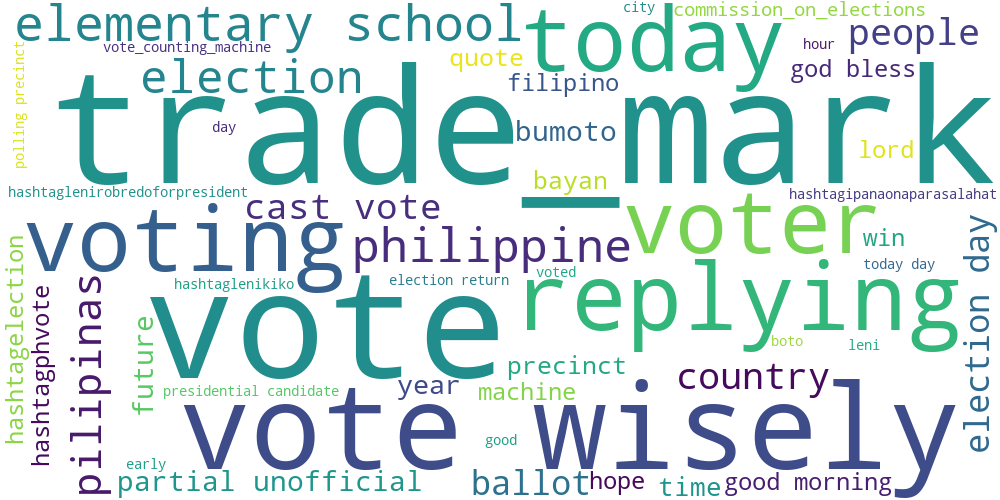

In [34]:
# The use of wordcloud to check if all steps were done correctly
from wordcloud import WordCloud

long_string = ','.join(list(dataset['Corrected_Words'].values))
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue',width=1000, height=500)
wordcloud.generate(long_string)
wordcloud.to_image()

## Topic Modeling

In [35]:
import gensim
from gensim import corpora
import numpy as np

documents = dataset['Corrected_Words'].values
tokenized_documents = [doc.split(",") for doc in documents] 

#Create Dictionary
id2word = corpora.Dictionary(tokenized_documents)

#Create Corpus
texts = tokenized_documents

#Term Document Frequency
corpus = [id2word.doc2bow(doc) for doc in tokenized_documents] 

In [36]:
# Build the LDA model
num_topics = 4 
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=15,
                                            random_state=42,chunksize=50,per_word_topics=True)
for topic_id, topic_words in lda_model.print_topics():
    print(f"Topic {topic_id}: {topic_words}")

Topic 0: 0.015*" unofficial" + 0.012*" vote_counting_machine" + 0.012*" ballot" + 0.011*"" + 0.008*" commission_on_elections" + 0.007*" election" + 0.007*" hashtagebotoph" + 0.007*" tally" + 0.007*" nalang" + 0.007*"partial"
Topic 1: 0.063*" vote" + 0.040*" wisely" + 0.021*"vote" + 0.018*" philippine" + 0.014*" day" + 0.014*" election" + 0.013*"voting" + 0.013*" country" + 0.012*" leni" + 0.012*" today"
Topic 2: 0.052*" trade_mark" + 0.020*"replying" + 0.019*" precinct" + 0.018*" voting" + 0.017*" voter" + 0.016*" school" + 0.015*" vote" + 0.014*" machine" + 0.012*" elementary" + 0.010*" polling"
Topic 3: 0.021*" pilipinas" + 0.015*" bumoto" + 0.013*" pila" + 0.011*" boto" + 0.008*" peaceful" + 0.008*"praying" + 0.008*" honest" + 0.008*"replying" + 0.007*" balota" + 0.007*" tama"


In [37]:
document_topics = []
for doc_bow in corpus:
    topics = lda_model[doc_bow]
    document_topics.append(topics)

print(f"Topics for During Election Tweets: {document_topics[0]}")

Topics for During Election Tweets: ([(0, 0.5846764), (1, 0.13373029), (2, 0.14336376), (3, 0.13822956)], [(0, [0]), (1, [0, 3, 2, 1]), (2, [1, 0, 3]), (3, [0, 3, 2, 1]), (4, [2]), (5, [3, 0]), (6, [0, 2]), (7, [0]), (8, [0])], [(0, [(0, 0.9988213)]), (1, [(0, 0.7666886), (1, 0.05092258), (2, 0.065426275), (3, 0.067123495)]), (2, [(0, 0.03293398), (1, 0.9486176), (3, 0.011137904)]), (3, [(0, 0.7083296), (1, 0.064671464), (2, 0.079705924), (3, 0.08389509)]), (4, [(2, 0.99903566)]), (5, [(0, 0.039564557), (3, 0.9521374)]), (6, [(0, 0.9827355), (2, 0.0128351385)]), (7, [(0, 0.99807155)]), (8, [(0, 0.99947125)])])


### Coherence Score

In [38]:
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

In [39]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_documents, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.42580652477658876


### Finding the Optimal Number of Topics

In [40]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=15,
                                            random_state=42,chunksize=50,per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=lda_model, texts=tokenized_documents, dictionary=id2word, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [41]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=8, step=1)

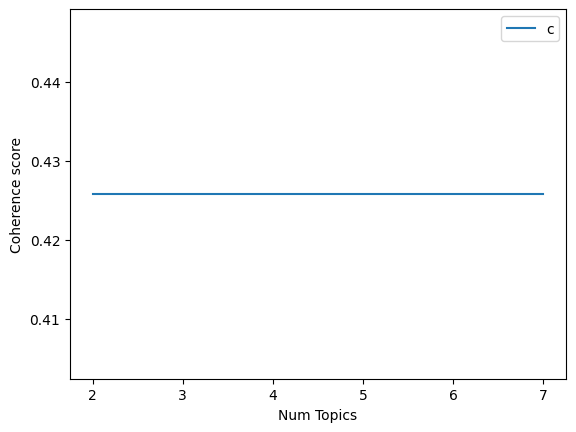

In [42]:
limit=8
start=2
step=1
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"),loc='best')
plt.show()

In [43]:
for m, cv in zip(x, coherence_values):
    print("Number of Topics =", m, "has Coherence Value of", round(cv,4))

Number of Topics = 2 has Coherence Value of 0.4258
Number of Topics = 3 has Coherence Value of 0.4258
Number of Topics = 4 has Coherence Value of 0.4258
Number of Topics = 5 has Coherence Value of 0.4258
Number of Topics = 6 has Coherence Value of 0.4258
Number of Topics = 7 has Coherence Value of 0.4258


### Topic Modeling Visualization

In [44]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
cloud = WordCloud(background_color='white', width=2500, height=2800, max_words=20,
                         colormap='tab10', color_func=lambda * args, **kwargs: cols[i],
                         prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)
topics

[(0,
  [(' unofficial', 0.014979815),
   (' vote_counting_machine', 0.012320256),
   (' ballot', 0.011506482),
   ('', 0.010990781),
   (' commission_on_elections', 0.007847462),
   (' election', 0.007460897),
   (' hashtagebotoph', 0.0069076144),
   (' tally', 0.0068661454),
   (' nalang', 0.006817687),
   ('partial', 0.0067884796)]),
 (1,
  [(' vote', 0.0625583),
   (' wisely', 0.040283028),
   ('vote', 0.020615177),
   (' philippine', 0.0177066),
   (' day', 0.014459737),
   (' election', 0.014441841),
   ('voting', 0.012768686),
   (' country', 0.012760162),
   (' leni', 0.012305991),
   (' today', 0.012221429)]),
 (2,
  [(' trade_mark', 0.05160342),
   ('replying', 0.019580794),
   (' precinct', 0.019302418),
   (' voting', 0.018271055),
   (' voter', 0.016602807),
   (' school', 0.016453814),
   (' vote', 0.015210767),
   (' machine', 0.0135104265),
   (' elementary', 0.011856401),
   (' polling', 0.009984029)]),
 (3,
  [(' pilipinas', 0.020663844),
   (' bumoto', 0.014889538),
 

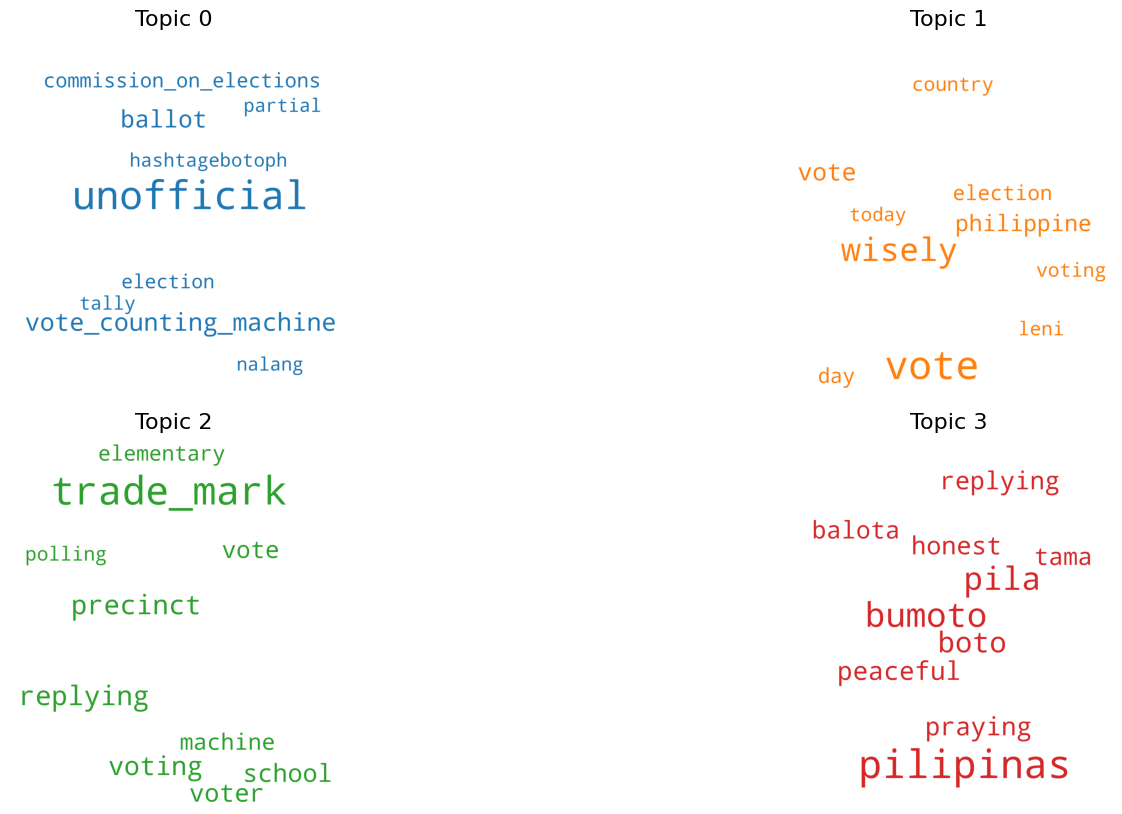

In [45]:
fig, axes = plt.subplots(2,2, figsize=(20,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words,max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic '+ str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0.1)
plt.axis('off')
plt.margins(x=0,y=0)
plt.tight_layout
plt.show()


# Sentiment Analysis

### Emoji Sentiment Analysis

#### Create another Dataframe which contains only emojis

In [46]:
emojies_df = dataset["Emoji"]

In [47]:
emojies_df.to_frame(name="Emoji")

,Emoji
0,
1,
2,
3,
4,
...,...
3723,
3724,
3725,"cherry_blossom, sheaf_of_rice"
3726,"check_mark_button, heart_hands_light_skin_tone..."


#### Emoji Extraction

In [48]:
#Remove whitespaces & extra commas from main emoji column to prepare for split
emojies_df = emojies_df.str.strip('')
emojies_df = emojies_df.str.strip(' ')
emojies_df = emojies_df.str.strip(',')
emojies_df

0                                                        
1                                                        
2                                                        
3                                                        
4                                                        
                              ...                        
3723                                                     
3724                                                     
3725                        cherry_blossom, sheaf_of_rice
3726    check_mark_button, heart_hands_light_skin_tone...
3727                                                     
Name: Emoji, Length: 3728, dtype: object

In [49]:
emojies_df = emojies_df.str.split(",",expand=True)
emojies_df

,0,1,2,3,4
0,,None,None,None,None
1,,None,None,None,None
2,,None,None,None,None
3,,None,None,None,None
4,,None,None,None,None
...,...,...,...,...,...
3723,,None,None,None,None
3724,,None,None,None,None
3725,cherry_blossom,sheaf_of_rice,None,None,None
3726,check_mark_button,heart_hands_light_skin_tone,face_with_tears_of_joy,None,None


In [50]:
emojies_df = emojies_df.replace(np.nan, 0)
emojies_df = emojies_df.replace('', 0)
emojies_df

,0,1,2,3,4
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
3723,0,0,0,0,0
3724,0,0,0,0,0
3725,cherry_blossom,sheaf_of_rice,0,0,0
3726,check_mark_button,heart_hands_light_skin_tone,face_with_tears_of_joy,0,0


In [51]:
def add_colon(value):
    if value != 0:
        return f":{value}:"
    return value

emojies_df = emojies_df.map(add_colon)
emojies_df

,0,1,2,3,4
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
3723,0,0,0,0,0
3724,0,0,0,0,0
3725,:cherry_blossom:,: sheaf_of_rice:,0,0,0
3726,:check_mark_button:,: heart_hands_light_skin_tone:,: face_with_tears_of_joy:,0,0


In [52]:
def remove_whitespace(value):
    if value != 0:
        return value.replace(" ", "")
    return value

emojies_df = emojies_df.map(remove_whitespace)
emojies_df

,0,1,2,3,4
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
3723,0,0,0,0,0
3724,0,0,0,0,0
3725,:cherry_blossom:,:sheaf_of_rice:,0,0,0
3726,:check_mark_button:,:heart_hands_light_skin_tone:,:face_with_tears_of_joy:,0,0


In [53]:
#Renaming column names for better labelling

column_name_prefix = "Emoji_"
emojies_df.columns = [column_name_prefix + str(col) for col in emojies_df.columns]
emojies_df

,Emoji_0,Emoji_1,Emoji_2,Emoji_3,Emoji_4
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
3723,0,0,0,0,0
3724,0,0,0,0,0
3725,:cherry_blossom:,:sheaf_of_rice:,0,0,0
3726,:check_mark_button:,:heart_hands_light_skin_tone:,:face_with_tears_of_joy:,0,0


In [54]:
#Transform Text to Emojis
def transform_text(value):
    if value != 0:
        value = emoji.emojize(value)
    return value 

emojies_df = emojies_df.map(transform_text)
emojies_df

,Emoji_0,Emoji_1,Emoji_2,Emoji_3,Emoji_4
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
3723,0,0,0,0,0
3724,0,0,0,0,0
3725,🌸,🌾,0,0,0
3726,✅,🫶🏻,😂,0,0


#### Start of Emoji Sentiment Analysis

In [55]:
from emosent import get_emoji_sentiment_rank
def get_sentiment(emoji):
    if emoji:
        try:
            sentiment = get_emoji_sentiment_rank(emoji)
            if sentiment:
                return sentiment['sentiment_score']
            else:
                return 0
        except KeyError:
            return 0
    else:
        return 0

In [56]:
emojies_df = emojies_df.applymap(get_sentiment)
emojies_df

C:\Users\casti\AppData\Local\Temp\ipykernel_15708\889906810.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  emojies_df = emojies_df.applymap(get_sentiment)


,Emoji_0,Emoji_1,Emoji_2,Emoji_3,Emoji_4
0,0.000,0.000,0.000,0,0
1,0.000,0.000,0.000,0,0
2,0.000,0.000,0.000,0,0
3,0.000,0.000,0.000,0,0
4,0.000,0.000,0.000,0,0
...,...,...,...,...,...
3723,0.000,0.000,0.000,0,0
3724,0.000,0.000,0.000,0,0
3725,0.652,0.583,0.000,0,0
3726,0.431,0.000,0.221,0,0
